# **Hands-on 3: Kmeans Notebook (Tutorial)**

## **Fundamentos de la tecnica**

Esta es una tecnica de aprendizaje no supervisado que se utiliza en los problemas de agrupacion.   
Se basa en la idea de dividir el conjunto de datos no etiquetados en K grupos los cuales son llamados centroides o *clusters*.
Este algoritmo tambien se utiliza de manera iterativa, esto lo hacen calculando clusters y viendo como se recalculan los datos, en el momento en que se alcanza el limite de iteraciones o los datos ya no tienen cambios significativos al mover los clusters es que el alogirtmo finaliza.

## **Modelo matematico**

El objetivo del modelo K-Means es minimizar la funcion de costo llamada SSE (Sum of Squared Errors)

$$
\arg\min_{C} \sum_{i=1}^{k} \sum_{x_j \in C_i} \lVert x_j - \mu_i \rVert^2
$$


## **Descripción de la librería, clases, funciones en su respectiva sección**

> *Se explicara en cada seccion cuando se vaya a utilizar*  

## **Pipeline**

### **Preprocesamiento**

Utilizaremos las siguientes librerias para esta seccion de preprocesamiento.  
* Pandas: Lo utilizaremos para todo lo relacionado a la manipulacion de nuestro dataset.  
* seaborn: Este lo utilizaremos para generar nuestros visuales basandose en nuesras estadisticas (mejores estilos visuales)  
* matplotlib: Libreria usada para mostrar los graficos que construyamos junto con seaborn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el dataset:

In [2]:
dataset = pd.read_csv("heart.csv")

Utilizamos info para conocer la estructura de nuestro dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Obtenemos las estadisticas basicas como: avg, desv std, max, min.. entre otros.

In [3]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Generaremos un pairplot general para ver la distribucion de nuestra variable objetivo en contraste con el resto de las variables de apoyo.

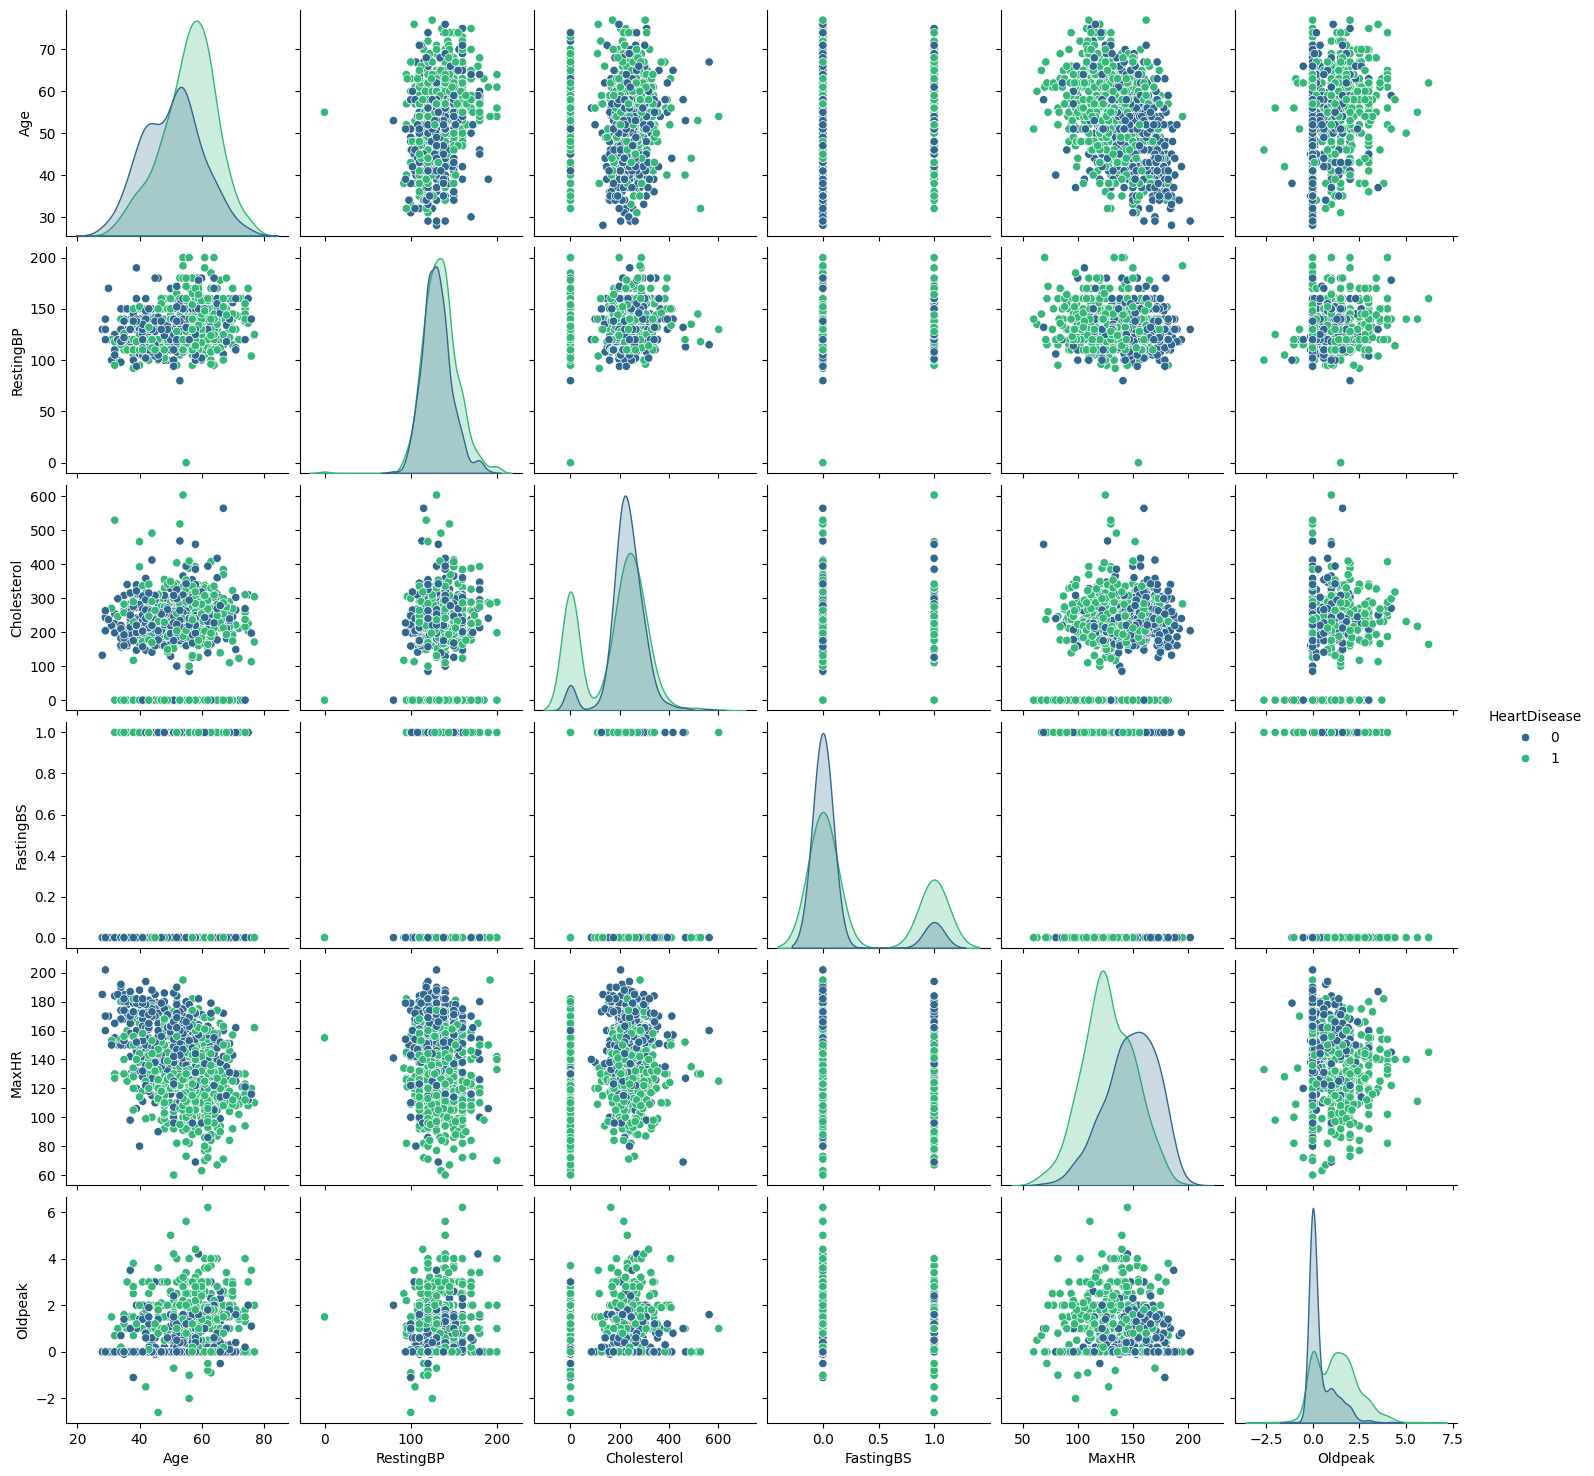

In [10]:
sns.pairplot(dataset, hue="HeartDisease", palette="viridis")
plt.show()

Utilizaremos la libreria StandardScaler para estandarizar nuestras variables numericas.

In [13]:
from sklearn.preprocessing import StandardScaler

Ahora tomaremos unicamente las columnas numericas para generar nuestras predicciones, esto con la intencion de evitar distancias muy dispersas debido a la influencia de variables categoricas al pasar por un OneHotEncoder (seran las que vimos en el pairplot).  

In [11]:
columnas_numericas = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','FastingBS']

In [14]:
dataset_nuevo = dataset[columnas_numericas]
scaler = StandardScaler()
dataset_standard = scaler.fit_transform(dataset_nuevo)

### **Prediction**

Importaremos nuestro modelo a utilizar:

In [15]:
from sklearn.cluster import KMeans

Para este problema utilizare dos clusters debido a que conozco que el dataset original tiene solo dos clases, de esta manera podre validar su precision en contraste con el dataset original.

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dataset_standard)

def clasificar(instancia):
    data = pd.DataFrame([instancia])
    data_scaled = scaler.transform(data)
    prediccion = kmeans.predict(data_scaled)[0]
    data["HeartDisease"] = prediccion
    return prediccion, data

Ahora podremos generar una instancia e intentar probarlo con nuestra funcion previamente generada.

In [18]:
nueva_instancia = {
    "Age": 55,
    "RestingBP": 140,
    "Cholesterol": 200,
    "MaxHR": 150,
    "Oldpeak": 1.2,
    "FastingBS": 1
}

In [19]:
prediccion, resultado = clasificar(nueva_instancia)
resultado

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease
0,55,140,200,150,1.2,1,0


### **Model Evaluation**

Si bien normalmente no se puede calcular algunas de estas metricas de evalaucion en una situacion real donde desconocemos lo que estamos intentando agrupar o clasificar, en este caso que si conocemos cuales deberian de ser los resultados podemos generar estas metricas.

Para esto utilizaremos los modulos de confusion_matrix y accuracy_score de sklearn

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

Obtenemos las columnas originales de nuestro dataset:

In [21]:
y_true = dataset["HeartDisease"]

In [22]:
y_pred = kmeans.labels_

#### **Matriz de Confusion**

In [24]:
cm = confusion_matrix(y_true, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[ 58 352]
 [238 270]]


#### **Accuracy**

In [25]:
acc = accuracy_score(y_true, y_pred)

In [26]:
print("\nAccuracy:", acc)


Accuracy: 0.3572984749455338


Como podemos ver en este caso el accuracy es bastante bajo, sin embargo debemos de tomar en cuenta lo siguiente.  
 1. El modelo de Kmeans no tiene el mejor rendimiento si lo usamos para comparar con etiquetas reales.
 2. Existe la posibilidad (50%) de que este agrupando de manera invertida debido a que nuestro modelo no entiende de sanos y enfermos, es decir; el solo agrupa, puede que a los enfermos (1) los este agrupando a la mayoria en el grupo 0, porque para el modelo es irrelevante si los agrupa en 0,1,2 o 3, para el es solo un grupo.  
Entonces es una variable a tomar en cuenta, podriamos invertir los cluster y ver si esto mejora la precision que efectivamente estuviera tomandolos de manera invertida.

In [29]:
acc2 = accuracy_score(y_true, 1 - y_pred)

In [31]:
print("\nAccuracy invertida:", acc2)


Accuracy invertida: 0.6427015250544662


Como podemos ver la precision aumento por lo cual es probable que en efecto se encontrara invertida, es debido a esto que no se suele usar K-means en problemas de clasificacion con dataset ya clasificados debido a que no reconoce a que pertenece cada grupo.

## **Referencias**

> Barrios, A. (2023, 8 agosto). Tutorial del Algoritmo K-Means en Python. Medium. https://medium.com/latinxinai/tutorial-del-algoritmo-k-means-en-python-d8055751e2f3  
> Aviña Méndez, J. A. (2025, Abril). Guiıa de Estudio:Clasificador k-Means